### Numpy

NumPy is a Python library for numerical computing. it introduce a simple yet powerful data structure: the multi-dimensional arrays. and provide a collection of mathematical functions with high efficiency
(the algorithms are implemented in C and complete in nanoseconds rather than seconds)

In [ ]:
import numpy as np

### lists vs. ndarrays

<h4> 1. Time

In [ ]:
import time

start = time.time()
for i in range(5):
  print(i)
  time.sleep(1)
print('Execution time: ',time.time()-start)

0
1
2
3
4
Execution time:  5.006363868713379


<h3> Q. How much time will it take to multiply 2 lists of length 1000?

In [ ]:
import timeit

def mul_lists(a,b):
  c = []
  for i in range(len(a)):
      c.append(a[i]*b[i])
  return c

In [ ]:
a = list(range(1000))
b = list(range(1000))

execution_time = timeit.timeit("mul_lists(a, b)",
                               setup="from __main__ import mul_lists, a, b",
                               number=1000)
execution_time

0.14676442400013912

In [ ]:
import numpy as np
a_arr = np.array(a)
b_arr = np.array(b)

code_to_test = "c = a_arr * b_arr"

# Time the NumPy array multiplication
execution_time = timeit.timeit(code_to_test, setup="from __main__ import a_arr, b_arr", number=1000)
execution_time


0.012790245999894978

<h4> 2. Space

In [ ]:
import numpy as np
import sys

# declaring a list of 1000 elements
S= range(1000) # change to lst!!!

print("List: size of element (in bytes): ",sys.getsizeof(S))
print("Size of the whole list in bytes: ",sys.getsizeof(S)*len(S))

# declaring a Numpy array of 1000 elements
D= np.arange(1000)

print("Numpy array: size of each element (in bytes): ",D.itemsize)
print("Size of the whole Numpy array in bytes: ",D.size*D.itemsize)


Size of each element of list in bytes:  48
Size of the whole list in bytes:  48000
Size of each element of the Numpy array in bytes:  8
Size of the whole Numpy array in bytes:  8000


numpy deals with n-dim array, which other packages do you know that do that? pytorch & TF - we will see the relationship between them.

Why do we need numpy? why not work with lists of n-dim?
- time
-arrangment in memory
- no object wrapping around, save lots of space
-kind of regression to C: single datatype, sits in a contingous space in memory --> saves time, eccelerate performance + good optimization package
 - Python scientific package Support lots of implementation
 and lots of other packages are based on numpy (eg pandas which will see next)

### Getting started: Create a numpy array

####  1D example

<h4> 1. Convert other Python structures (lists) to arrys

In [ ]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])
print(grades.dtype)
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12.0])
print(grades.dtype)

int64
float64


In [ ]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12], dtype=np.uint32)

Default datatypes: int64, float64 according to data
a = np.array([1, 2, 3])
b = np.array([1., 2., 3.])
you can check by printing b.dtype


(*) if you don't define dtype, it will be determined by the type of the input data. If the input data consists of integers, NumPy will use int64 on a 64-bit system (or int32 on a 32-bit system) by default. If the input contains floating-point numbers, it will default to float64.

In [ ]:
# Custing
grades2 = grades.astype(int)
print(grades.dtype)
print(grades2.dtype)

uint32
int64


Data types size:

- uint8, 8 bits
- uint16, 16 bits
- uint32, 32 bits
- uint64, 64 bits

- float16, 16 bits
- float32, 32 bits
- float64, 64 bits
- float96, 96 bits
- float128, 128 bits

In [ ]:
#check array shape
grades.shape

(8,)

2. Use NumPy array creation functions (e.g. arange, ones, zeros)

In [ ]:
five_zeros = np.zeros(5)
five_zeros

array([0., 0., 0., 0., 0.])

In [ ]:
six_ones = np.ones(6,dtype=int)

In [ ]:
two_to_nine = np.arange(2, 10, 0.1, dtype=float)
type(two_to_nine)
two_to_nine

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7,
       9.8, 9.9])

3. read data from file

In [ ]:
loaded_data = np.load('neural_activity_data.npy')

In [ ]:
loaded_data.shape

(100, 1000)

Slicing arrays:

In [11]:
a = np.arange(12)
a[:4]

array([0, 1, 2, 3])

#### Basic operations:

In [13]:
# Arithmetics
c= np.ones(3)
print(c+c)
print(c+2)
print(c*c)

[2. 2. 2.]
[3. 3. 3.]
[1. 1. 1.]


In [19]:
print(c,c)
c.dot(c)

[1. 1. 1.] [1. 1. 1.]


3.0

In [ ]:
c+2

array([3., 3., 3.])

In [20]:
# Comparisons:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b


array([False,  True, False,  True])

In [21]:
# Logical operations:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)


array([ True,  True,  True, False])

In [31]:
a = np.array([1,2,3,4,5,])
b = np.array([2,3,4,5,6])
c = np.where(a>2)
c
c = a>2
c
d = b>2
d
a[np.logical_and(c,d)]

array([3, 4, 5])

In [43]:
#Numerical operations
a = np.arange(5)
print(np.sin(a))
print(np.log(a))
print(np.exp(a))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
[      -inf 0.         0.69314718 1.09861229 1.38629436]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


<ipython-input-43-1c31c3adb58b>:4: RuntimeWarning: divide by zero encountered in log
  print(np.log(a))


In [44]:
# Statistics:
a = np.array([1, 2, 3, 1])
print(a.mean())
print(a.std())
print(np.median(a))

1.75
0.82915619758885
1.5


#### Cool arithmetic operations

**Vectorization** is the process of performing the same operation in the same way for each element in an array. This removes for loops from your code but achieves the same result.

**Broadcasting** is the process of extending two arrays of different shapes and figuring out how to perform a vectorized calculation between them.

For example:

**Broadcasting**: Grades is an array of numbers (shape-(8,)), and factor is a scalar. NumPy adds the scalar to each item in the array and returns a new array with the results.

In [ ]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12], dtype=np.uint32)

In [ ]:
grades.shape

(8,)

In [ ]:
factor = 5

In [ ]:
corrected_grades = grades*1.2 + factor
corrected_grades

array([ 91.4,  47. ,  81.8, 110.6,  66.2, 113. ,  93.8,  19.4])

113 is not a valid grade.. we can make sure values are in range using clip (limit the values to defined minimum and maximum)

In [ ]:
np.clip(corrected_grades, a_min=0 ,a_max=100)

array([ 91.4,  47. ,  81.8, 100. ,  66.2, 100. ,  93.8,  19.4])

**Vectorization**: do the same, use and array of factor of the same size instead of Broadcasting a sclar

In [ ]:
np.clip(grades*1.2 + factor*np.ones(len(grades)), a_min=0, a_max=100)

array([ 91.4,  47. ,  81.8, 100. ,  66.2, 100. ,  93.8,  19.4])

### 2D and up (Matrices & tensors)

Initialization

In [ ]:
a = np.zeros((2,3))
b = np.ones((4,5))
print(a.shape)
print(b.shape)

(2, 3)
(4, 5)


More operations:

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = a @ b
c

array([[19, 22],
       [43, 50]])

In [ ]:
mat = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
mat.shape

(3, 4)

Shape manipulation:

In [ ]:
mat.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [ ]:
mat.flatten() # returns a copy

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
mat.ravel() # returns a view

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
mat.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [ ]:
print(mat.max())
print(mat.max(axis=0))
print(mat.max(axis=1))

12
[ 9 10 11 12]
[ 4  8 12]


In [ ]:
mat

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Slicing 2D arrays:


In [ ]:

mat[2,:]

array([ 9, 10, 11, 12])

In [ ]:
mat[:,2]

array([ 3,  7, 11])

### Simulations: create arrays with random values

When is it useful?

1.  Use python for random experiments: create random data

In [ ]:
rand_mat = np.random.rand(30, 40)

In [ ]:
rand_mat.shape

(30, 40)

In [ ]:
np.mean(rand_mat)

0.48612280398057994

Super helpful: every matrix can be plotted

Remember 'Picture' is nothing but an alias to a 3D matrix..

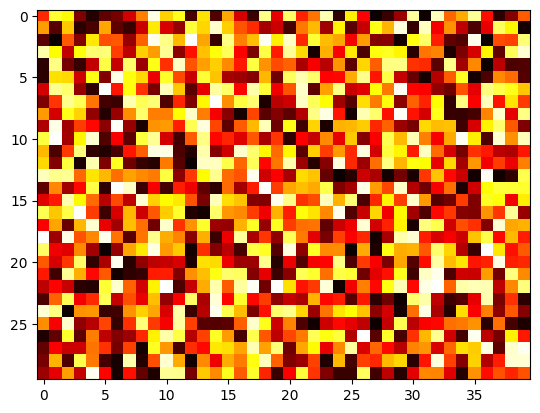

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(rand_mat, cmap=plt.cm.hot)
plt.show()

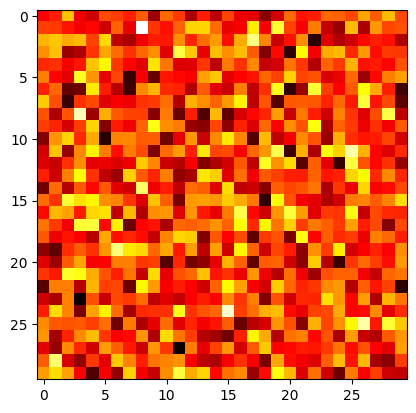

In [ ]:
rand_mat = np.random.randn(30, 30)
plt.imshow(rand_mat, cmap=plt.cm.hot)
plt.show()

2. Add random noise

In [ ]:
x = np.arange(0, 1, 0.01)
signal = np.sin(2 * np.pi * 2 * x)
x_len = signal.shape[0]
noise = np.random.randn(x_len)

In [ ]:
noise.shape

(100,)

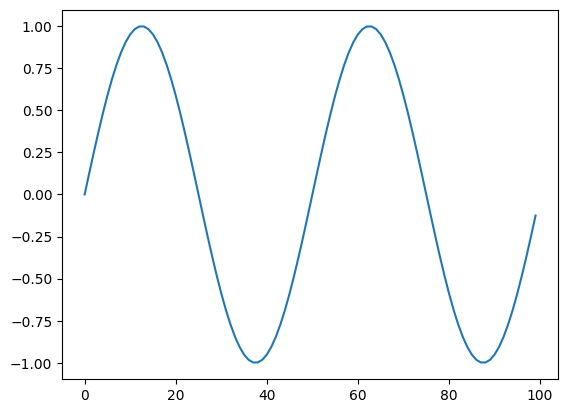

In [ ]:
import matplotlib.pyplot as plt
plt.plot(signal)

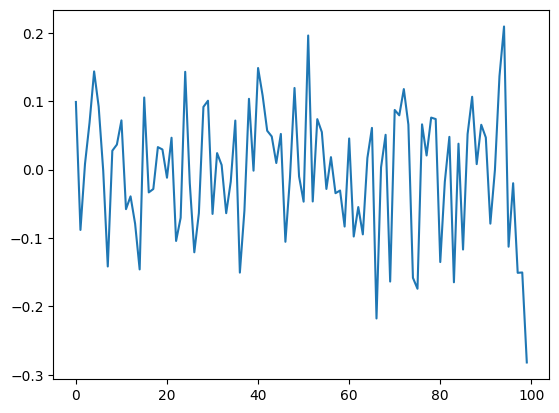

In [ ]:
plt.plot(0.1*noise)

<h3> Q. what if I want smaller fluctuations?

(!) np.random.rand, and randn generate values between 0 and 1, adjust if needed

In [ ]:
np.random.rand(5)*100

array([79.38342652, 67.56264146, 76.721158  ,  8.66789999,  1.65493694])

(!!) np.random.rand() generates values from a uniform distribution over the interval [0, 1]. The values are evenly distributed.

np.random.randn() generates values from a normal (Gaussian) distribution with mean = 0 and standard deviation = 1.

#### Reproducability, how to get the same random state?

In [ ]:
np.random.seed(<your favorite number here>)

Pseudo-random numbers work by starting with a number (the seed), multiplying it by a large number, adding an offset, then taking modulo of that sum. The resulting number is then used as the seed to generate the next "random" number. When you set the seed (every time), it does the same thing every time, giving you the same sequence of numbers.

### Use python for data exploration

#### Dataset: type of personality ####


1. **Age:** A continuous variable representing the age of the individual.

2. **Gender:** A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

3. **Education:** A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

4. **Interest:** A categorical variable representing the individual's primary area of interest.

5. **Introversion Score:** A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

6. **Sensing Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

7. **Thinking Score:** A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

8. **Judging Score:** A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

9. **Personality:** Target that contains People Personality Type

For this taks we'll take only Age, Education, Judging Score and JF Score

What research quetions can you ask?

In [ ]:
loaded_data = np.load('personality_3col.npy')

In [ ]:
loaded_data.shape

(128061, 4)

In [ ]:
loaded_data[:5,:]

array([[19.        ,  0.        ,  4.36027835, 13.31194698],
       [27.        ,  0.        ,  4.22142107, 13.21301877],
       [21.        ,  0.        ,  5.12731958, 14.83293517],
       [28.        ,  0.        ,  5.98655026, 19.25317935],
       [36.        ,  1.        ,  4.67721296, 14.21214959]])

In [ ]:
print(loaded_data.mean(axis=0))
print(loaded_data.std(axis=0))

print(loaded_data.min(axis=0))
print(loaded_data.max(axis=0))

[26.34909145  0.41115562  4.57829273 14.44252   ]
[4.90800324 0.49204337 1.39157618 3.61698127]
[18.          0.          0.          0.09379219]
[19. 27. 21. ... 26. 24. 27.]


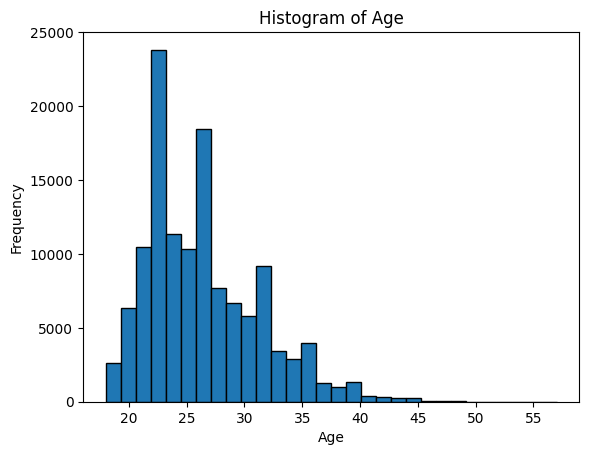

In [ ]:
# create and plot the data's histogram
import matplotlib.pyplot as plt

data = loaded_data[:,0] #mat.flatten()
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

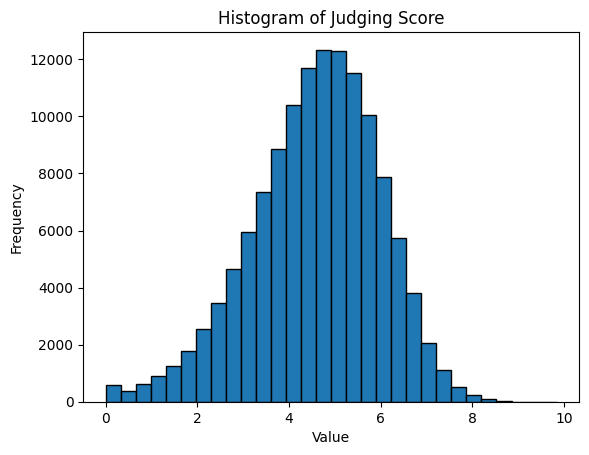

In [ ]:
# create and plot the data's histogram
import matplotlib.pyplot as plt

data = loaded_data[:,2] #mat.flatten()
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram of Judging Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

I suspect there's a correlation between the first and the second Judge scores

In [ ]:
array1_flat = loaded_data[:,2].flatten()
array2_flat = loaded_data[:,3].flatten()

# Compute correlation
corr_matrix = np.corrcoef(array1_flat, array2_flat)
corr_matrix

array([[1.        , 0.96114801],
       [0.96114801, 1.        ]])

In [ ]:
corr_matrix[0, 1]

0.9611480075850976

#### Fit a linear regression line

In [ ]:
# Judging Score vs. JF Score
x = loaded_data[:100, 2]
y = loaded_data[:100, 3]

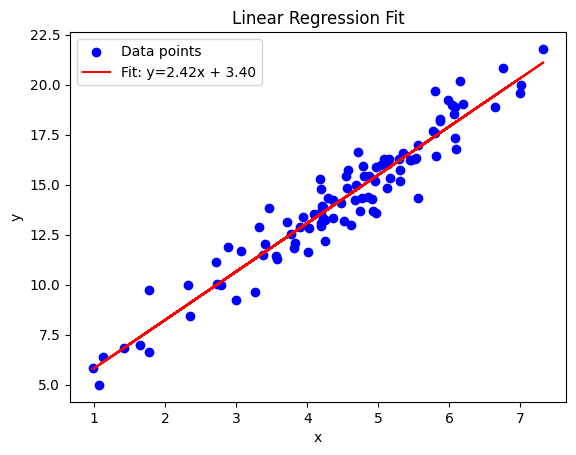

In [ ]:
# Fit a regression line using np.polyfit
coefficients = np.polyfit(x, y, 1)  # polynomial with degree=1
slope, intercept = coefficients # unpack coefficients
y_fit = slope * x + intercept # and use them to create the (predicted) y values

# Plot results
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, y_fit, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#### What if we know the relationship between variables is not linear?

In [ ]:
y = np.cos(x) + 0.3*np.random.rand(100)

In [ ]:
coefficients = np.polyfit(x, y, 3)  # choose polynomial with degree>1
coefficients

array([-0.07813104,  1.09933957, -4.33919537,  4.37040724])

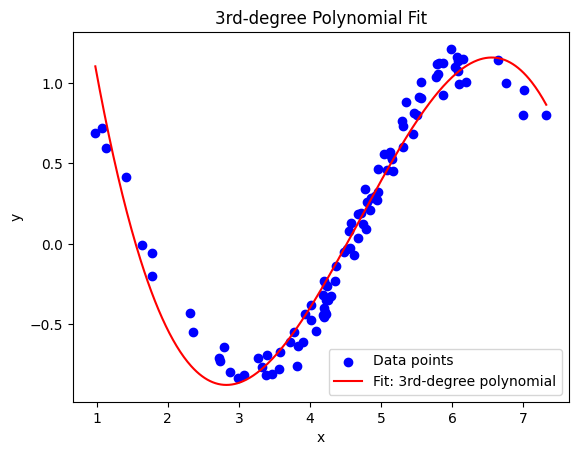

In [ ]:
# Create a polynomial object from a list of coefficients
polynomial = np.poly1d(coefficients)
# Upsample x to get a smooth polynomial curve
x_smooth = np.linspace(min(x), max(x), 500) # usefull function
y_fit = polynomial(x_smooth)

# Plot the original data points and the polynomial fit
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x_smooth, y_fit, color='red', label=f'Fit: 3rd-degree polynomial')
plt.title('3rd-degree Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()